# PRÁCTICA MACHINE LEARNING: Concurso de predicción de fallos en bombas de agua


- Fuente: DrivenData. (2015). Pump it Up: Data Mining the Water Table. Retrieved [Month Day Year] from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table.

## 0. Importar librerías

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

## 1. Crear dataframes train y test

In [128]:
# Lectura de datos
df_train=pd.read_csv('pumps_train.csv', parse_dates=True)

df_test= pd.read_csv("pumps_test.csv", parse_dates=True)

df_labels=pd.read_csv('pumps_labels.csv', parse_dates=True)

In [129]:
# Guardamos el id del conjunto de test para poder usarlo más tarde 
df_test.head()
id= df_test["id"]
id.head()

0    50785
1    51630
2    17168
3    45559
4    49871
Name: id, dtype: int64

In [130]:
# Vemos las dimensiones de ambos dataframes
print(df_train.shape)
print(df_test.shape)

(59400, 40)
(14850, 40)


In [131]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## 2. Pintar variables de dataframe de train

In [132]:
# Descriptivos básicos para las variables numéricas: Número de valores distintos por variable
df_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [133]:
# Descriptivos básicos para las variables categóricas
df_train.describe(exclude=np.number)

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [134]:
df_train.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [135]:
# Revisamos formato de las variables
df_train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

## 3. Crear dataframe conjunto train+test (df_full) para preprocesado de datos

In [136]:
# Creamos una columna nueva para poder diferenciar cada uno de ellos y lo que haremos más tarde, lo separaremos para limpiar todo el dataset
df_train["diff"] = "train"
df_test["diff"] = "test"

In [137]:
# Concatenamos los dos dataset
df_full = pd.concat([df_train, df_test], sort = False, ignore_index=True)

df_full.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,diff
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,train
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,train
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,train
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,train
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,train


In [138]:
df_full.shape

(74250, 41)

In [139]:
df_full.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [140]:
# Creamos un dataframe para las variables categóricas y otro para las numéricas para verlos por separado
cat_cols= df_full.select_dtypes(include=['object','category']).columns
num_cols = df_full.select_dtypes(exclude=['object','category']).columns

df_full[cat_cols].describe()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,diff
count,74250,69746,69718,74250,74250,73780,74250,74250,74250,70095,...,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250
unique,369,2140,2410,45684,9,21425,21,125,2098,2,...,8,6,5,5,10,7,3,7,6,2
top,2011-03-17,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,train
freq,695,11299,21751,4440,12871,646,6599,3128,386,63749,...,63505,63505,41522,41522,21216,21216,57286,35628,43239,59400


In [141]:
df_full[num_cols].describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [142]:
df_full.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

## 4. Tratamiento de nulos 

In [143]:
# Vamos a ver cuántos nulos tenemos
df_full.isnull().sum()   

id                           0
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [144]:
df_full.nunique()

id                       74250
amount_tsh                 102
date_recorded              369
funder                    2140
gps_height                2456
installer                 2410
longitude                71870
latitude                 71869
wpt_name                 45684
num_private                 68
basin                        9
subvillage               21425
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2098
population                1128
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2868
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

## 5. Eliminamos variables innecesarias

Revisando los datos, podemos empezar a descartar algunas variables porque no van a afectar mucho. Eliminamos:
- longitude, latitude, wpt_name y subvillage debido a que hay demasiados valores únicos, por lo que no tendrán el peso suficiente.
- scheme_name debido a que tiene demasiados nulos
- recorded_by ya que solo hay un valor, por lo que tendrá todo el peso
- extraction_type, extraction_type_class, payment_type','source_class','source_type', quality_group','quantity_group ya que se repiten
- region y region_code no son útiles por lo que los eliminaremos también

In [145]:
#total = total.drop(['amount_tsh', 'longitude', 'latitude','date_recorded','construction_year' ], axis=1)

df_full = df_full.drop(['amount_tsh', 'longitude', 'latitude','extraction_type','extraction_type_class','management_group','scheme_management','payment_type','source_class','source_type','quality_group','quantity_group', 'waterpoint_type_group','region','region_code','recorded_by','wpt_name', 'subvillage'], axis=1)

In [146]:
df_full.isnull().sum()   

id                           0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
num_private                  0
basin                        0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
scheme_name              35258
permit                    3793
construction_year            0
extraction_type_group        0
management                   0
payment                      0
water_quality                0
quantity                     0
source                       0
waterpoint_type              0
diff                         0
dtype: int64

In [147]:
df_full.dtypes

id                        int64
date_recorded            object
funder                   object
gps_height                int64
installer                object
num_private               int64
basin                    object
district_code             int64
lga                      object
ward                     object
population                int64
public_meeting           object
scheme_name              object
permit                   object
construction_year         int64
extraction_type_group    object
management               object
payment                  object
water_quality            object
quantity                 object
source                   object
waterpoint_type          object
diff                     object
dtype: object

## 6. Cambios de formato de las variables

In [148]:
# Procedemos a cambiar a date time aquellos que son necesarios: date_recorded y construction_year

# Primero, para construction_year deberemos sustituir los años 0 por datos nulos para que nos permita realizar el cambio de formato: 
#df_full = df_full.replace(0, np.nan)

#df_full['construction_year'] = pd.to_datetime(df_full['construction_year'], yearfirst=True, format='%Y')
#df_full['construction_year'].dtypes

#df_full['date_recorded'] = df_full['date_recorded'].astype('int64')


In [149]:
# Vemos que el formato obtenido es el correcto (datetime es lo mismo a <M8[ns])
#np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

In [150]:
# Hacemos lo mismo con date_recorded
#df_full['date_recorded'] = pd.to_datetime(df_full['date_recorded'], format = '%Y-%m-%d')
#df_full['date_recorded'].dtypes

In [151]:
# Vemos que tenemos un par de variables que deberían ser booleanos porque son true or false: permit / public_meeting 
## Las variables permit, public_meeting cuando están a nulo significa que es NO (0)

var_no = ['permit','public_meeting']

for i in var_no:
    df_full[i].fillna(value=False,inplace=True)

In [152]:
df_full['public_meeting'].value_counts()

True     63749
False    10501
Name: public_meeting, dtype: int64

In [153]:
df_full['permit'].value_counts()

True     48606
False    25644
Name: permit, dtype: int64

In [154]:
# Para tratar los nulos en las variables 'funder' e 'installer', vamos a rellenar los nulos con la MODA

# ffill, bfill, interpolate

df_full[['funder', 'installer']] = df_full[['funder', 'installer']].fillna(df_full.mode().iloc[0])

In [155]:
cat_cols= df_full.select_dtypes(include=['object','category']).columns
num_cols = df_full.select_dtypes(exclude=['object','category']).columns

In [156]:
cat_cols.value_counts()

date_recorded            1
funder                   1
installer                1
basin                    1
lga                      1
ward                     1
scheme_name              1
extraction_type_group    1
management               1
payment                  1
water_quality            1
quantity                 1
source                   1
waterpoint_type          1
diff                     1
dtype: int64

In [157]:
df_full['funder'].shape

(74250,)

In [158]:
df_full.dtypes

id                        int64
date_recorded            object
funder                   object
gps_height                int64
installer                object
num_private               int64
basin                    object
district_code             int64
lga                      object
ward                     object
population                int64
public_meeting             bool
scheme_name              object
permit                     bool
construction_year         int64
extraction_type_group    object
management               object
payment                  object
water_quality            object
quantity                 object
source                   object
waterpoint_type          object
diff                     object
dtype: object

## 7. Variables categóricas a numéricas

In [159]:
# Usamos el label encoder para cambiar todas las variables a numéricas ya que para algunos modelos no funcionan si hay variables categóricas

le = LabelEncoder()

In [160]:
for col in cat_cols:
    df_full[col] = le.fit_transform(df_full[col])

In [161]:
num_cols = df_full.select_dtypes(exclude=['object','category']).columns

In [162]:
df_full.columns.tolist()

['id',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'num_private',
 'basin',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type_group',
 'management',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'diff']

In [163]:
df_full.dtypes

id                       int64
date_recorded            int32
funder                   int32
gps_height               int64
installer                int32
num_private              int64
basin                    int32
district_code            int64
lga                      int32
ward                     int32
population               int64
public_meeting            bool
scheme_name              int32
permit                    bool
construction_year        int64
extraction_type_group    int32
management               int32
payment                  int32
water_quality            int32
quantity                 int32
source                   int32
waterpoint_type          int32
diff                     int32
dtype: object

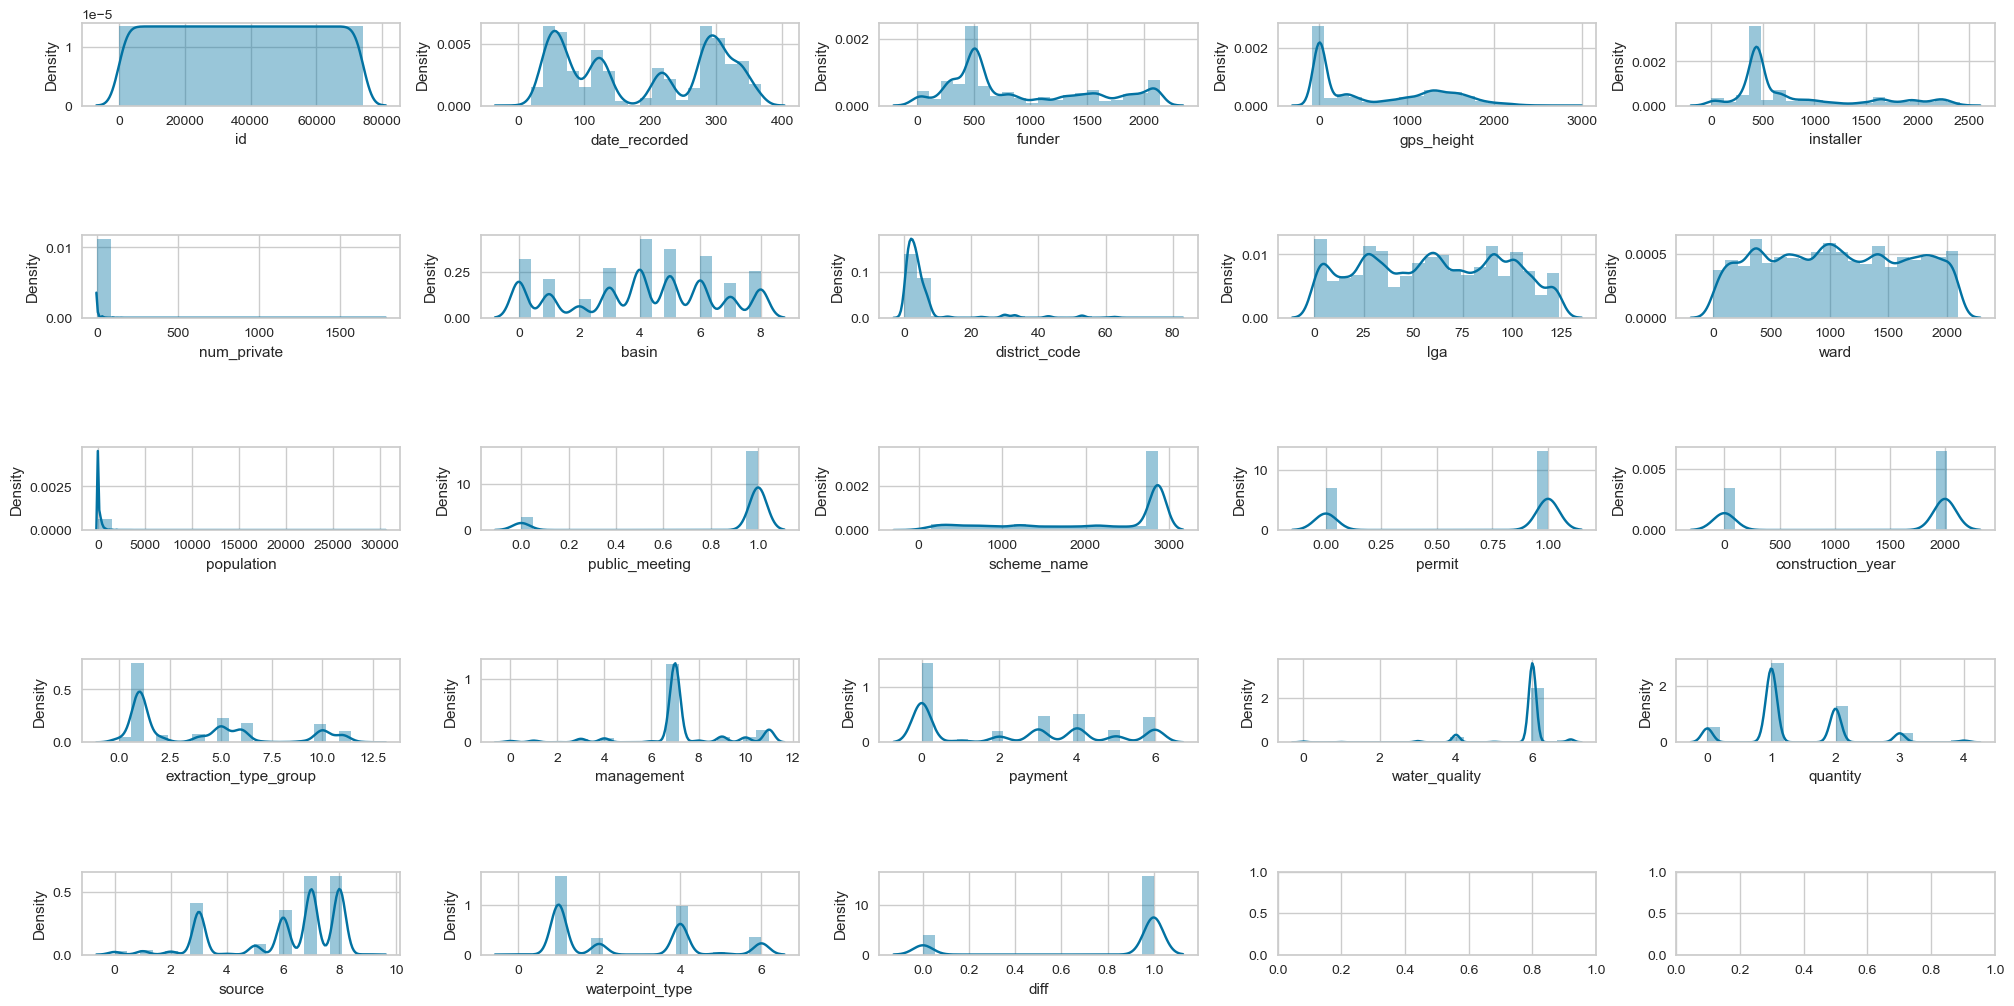

In [164]:
# Variables numéricas
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(20, 10))
axs = axs.flatten() # 

index = 0
for k,v in df_full[num_cols].items(): 
    if  (k == 'permanencia'):
        sns.countplot(v, ax=axs[index])
    else:
        sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0) 

In [165]:
# Creamos una tabla de correlacion para ver si podemos descartar más variables

list_correlacion = ['id',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'num_private',
 'basin',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type_group',
 'management',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'diff']

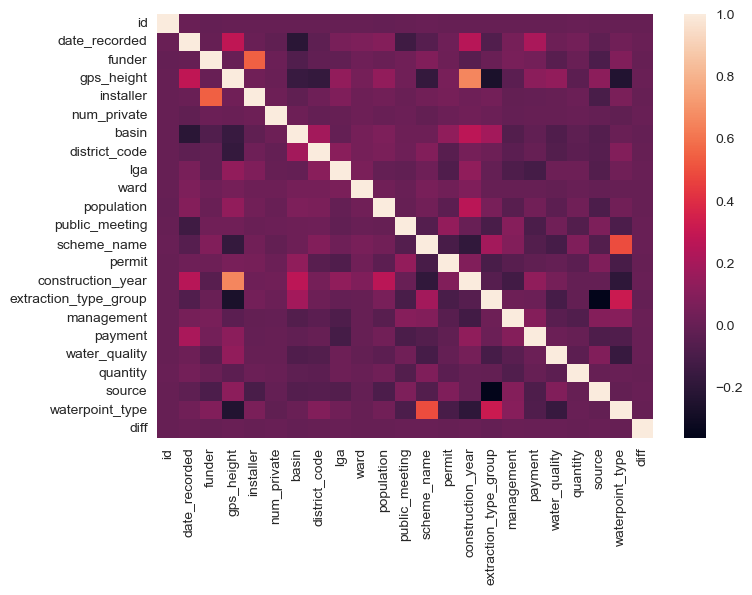

In [166]:
df_correlacion = df_full[list_correlacion]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

## 8. Modelado

Terminado el procesado de datos, empezamos a preparar y separar los modelos que queramos

### 8.1. Revisión de df_train y df_test

In [167]:
n_train = len(df_train)
print(n_train)

59400


In [168]:
df_train = df_full.iloc[:n_train, :]
df_train.shape

(59400, 23)

In [169]:
df_train.head()

,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff
0,69572,54,1548,1390,1706,0,1,5,51,1429,...,False,1999,1,7,2,6,1,8,1,1
1,8776,322,522,1399,610,0,4,2,103,1581,...,True,2010,1,11,0,6,2,5,1,1
2,34310,313,924,686,2296,0,5,4,108,1629,...,True,2009,1,7,4,6,1,0,2,1
3,67743,285,1961,263,2078,0,7,63,87,1576,...,True,1986,10,7,0,6,0,3,2,1
4,19728,111,20,0,133,0,4,1,26,1692,...,True,0,1,1,0,6,3,5,1,1


In [170]:
df_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [171]:
# Juntamos las tablas de train con las etiquetas del estado de cada bomba mediante el campo 'id'
df_train = pd.merge(df_train, df_labels, on=['id'], how ='inner')
df_train.head()

,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff,status_group
0,69572,54,1548,1390,1706,0,1,5,51,1429,...,1999,1,7,2,6,1,8,1,1,functional
1,8776,322,522,1399,610,0,4,2,103,1581,...,2010,1,11,0,6,2,5,1,1,functional
2,34310,313,924,686,2296,0,5,4,108,1629,...,2009,1,7,4,6,1,0,2,1,functional
3,67743,285,1961,263,2078,0,7,63,87,1576,...,1986,10,7,0,6,0,3,2,1,non functional
4,19728,111,20,0,133,0,4,1,26,1692,...,0,1,1,0,6,3,5,1,1,functional


In [172]:
df_train.dtypes

id                        int64
date_recorded             int32
funder                    int32
gps_height                int64
installer                 int32
num_private               int64
basin                     int32
district_code             int64
lga                       int32
ward                      int32
population                int64
public_meeting             bool
scheme_name               int32
permit                     bool
construction_year         int64
extraction_type_group     int32
management                int32
payment                   int32
water_quality             int32
quantity                  int32
source                    int32
waterpoint_type           int32
diff                      int32
status_group             object
dtype: object

In [173]:
df_test = df_full.iloc[n_train:, :]
df_test.shape

(14850, 23)

In [174]:
df_test.dtypes

id                       int64
date_recorded            int32
funder                   int32
gps_height               int64
installer                int32
num_private              int64
basin                    int32
district_code            int64
lga                      int32
ward                     int32
population               int64
public_meeting            bool
scheme_name              int32
permit                    bool
construction_year        int64
extraction_type_group    int32
management               int32
payment                  int32
water_quality            int32
quantity                 int32
source                   int32
waterpoint_type          int32
diff                     int32
dtype: object

In [175]:
df_test.head()

,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff
59400,50785,292,345,1996,426,0,0,3,63,18,...,True,2012,6,3,0,6,3,5,6,0
59401,51630,292,507,1569,442,0,5,2,0,693,...,True,2000,1,7,0,6,2,8,1,0
59402,17168,289,507,1567,442,0,0,2,109,1792,...,False,2010,6,7,0,6,2,5,6,0
59403,45559,279,443,267,545,0,7,43,49,1283,...,True,1987,6,7,6,6,0,7,6,0
59404,49871,343,150,1260,164,0,7,3,61,1157,...,True,2000,1,9,3,6,1,8,1,0


In [176]:
# Como vemos al concatenar se nos ha desordenado el index, por lo que debemos resetearlo

df_test = df_test.reset_index()
df_test = df_test.drop("index", axis=1)
df_test.head()

,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff
0,50785,292,345,1996,426,0,0,3,63,18,...,True,2012,6,3,0,6,3,5,6,0
1,51630,292,507,1569,442,0,5,2,0,693,...,True,2000,1,7,0,6,2,8,1,0
2,17168,289,507,1567,442,0,0,2,109,1792,...,False,2010,6,7,0,6,2,5,6,0
3,45559,279,443,267,545,0,7,43,49,1283,...,True,1987,6,7,6,6,0,7,6,0
4,49871,343,150,1260,164,0,7,3,61,1157,...,True,2000,1,9,3,6,1,8,1,0


### 8.2. Análisis de componentes principales (PCA)

In [177]:
df_train

,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff,status_group
0,69572,54,1548,1390,1706,0,1,5,51,1429,...,1999,1,7,2,6,1,8,1,1,functional
1,8776,322,522,1399,610,0,4,2,103,1581,...,2010,1,11,0,6,2,5,1,1,functional
2,34310,313,924,686,2296,0,5,4,108,1629,...,2009,1,7,4,6,1,0,2,1,functional
3,67743,285,1961,263,2078,0,7,63,87,1576,...,1986,10,7,0,6,0,3,2,1,non functional
4,19728,111,20,0,133,0,4,1,26,1692,...,0,1,1,0,6,3,5,1,1,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,351,486,1210,229,0,5,5,16,1092,...,1999,1,9,4,6,1,8,1,1,functional
59396,27263,97,196,1212,299,0,6,4,91,354,...,1996,1,7,2,6,1,6,1,1,functional
59397,37057,82,507,0,442,0,6,7,59,177,...,0,11,7,3,1,1,3,4,1,functional
59398,31282,48,992,0,1360,0,6,4,11,1452,...,0,5,7,0,6,2,7,4,1,functional


In [178]:
df_train_1 = df_train.drop(['status_group'], axis = 1)
df_train_1

,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff
0,69572,54,1548,1390,1706,0,1,5,51,1429,...,False,1999,1,7,2,6,1,8,1,1
1,8776,322,522,1399,610,0,4,2,103,1581,...,True,2010,1,11,0,6,2,5,1,1
2,34310,313,924,686,2296,0,5,4,108,1629,...,True,2009,1,7,4,6,1,0,2,1
3,67743,285,1961,263,2078,0,7,63,87,1576,...,True,1986,10,7,0,6,0,3,2,1
4,19728,111,20,0,133,0,4,1,26,1692,...,True,0,1,1,0,6,3,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,351,486,1210,229,0,5,5,16,1092,...,True,1999,1,9,4,6,1,8,1,1
59396,27263,97,196,1212,299,0,6,4,91,354,...,True,1996,1,7,2,6,1,6,1,1
59397,37057,82,507,0,442,0,6,7,59,177,...,False,0,11,7,3,1,1,3,4,1
59398,31282,48,992,0,1360,0,6,4,11,1452,...,True,0,5,7,0,6,2,7,4,1


In [179]:
df_train_1 = df_train_1.dropna()

In [180]:
# Escalado de datos

scaler = StandardScaler()
scaler.fit(df_train_1)

X = scaler.transform(df_train_1)

pd.DataFrame(X, columns = df_train_1.columns)

,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff
0,1.512933,-1.216378,0.994540,1.041252,1.435209,-0.038749,-1.244276,-0.065370,-0.256493,0.618694,...,-1.375061,0.733857,-0.832581,-0.134813,-0.140018,0.272762,-0.405301,0.952132,-0.883614,0.0
1,-1.320990,1.184689,-0.611198,1.054237,-0.321287,-0.038749,-0.031205,-0.376781,1.218927,0.873279,...,0.727241,0.745416,-0.832581,1.820837,-1.020594,0.272762,0.838878,-0.522669,-0.883614,0.0
2,-0.130757,1.104056,0.017951,0.025541,2.380767,-0.038749,0.373152,-0.169174,1.360795,0.953675,...,0.727241,0.744365,-0.832581,-0.134813,0.740559,0.272762,-0.405301,-2.980671,-0.322265,0.0
3,1.427676,0.853198,1.640904,-0.584751,2.031391,-0.038749,1.181867,5.955245,0.764952,0.864905,...,0.727241,0.720196,1.719132,-0.134813,-1.020594,0.272762,-1.649479,-1.505870,-0.322265,0.0
4,-0.810478,-0.705703,-1.396851,-0.964200,-1.085746,-0.038749,-0.031205,-0.480585,-0.965829,1.059194,...,0.727241,-1.366788,-0.832581,-3.068289,-1.020594,0.272762,2.083056,-0.522669,-0.883614,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,1.101195,1.444506,-0.667540,0.781553,-0.931893,-0.038749,0.373152,-0.065370,-1.249564,0.054251,...,0.727241,0.733857,-0.832581,0.843012,0.740559,0.272762,-0.405301,0.952132,-0.883614,0.0
59396,-0.459244,-0.831132,-1.121403,0.784439,-0.819708,-0.038749,0.777509,-0.169174,0.878446,-1.181829,...,0.727241,0.730704,-0.832581,-0.134813,-0.140018,0.272762,-0.405301,-0.031068,-0.883614,0.0
59397,-0.002710,-0.965520,-0.634674,-0.964200,-0.590530,-0.038749,0.777509,0.142237,-0.029505,-1.478288,...,-1.375061,-1.366788,2.002655,-0.134813,0.300271,-5.277783,-0.405301,-1.505870,0.800433,0.0
59398,-0.271904,-1.270133,0.124374,-0.964200,0.880695,-0.038749,0.777509,-0.169174,-1.391431,0.657217,...,0.727241,-1.366788,0.301514,-0.134813,-1.020594,0.272762,0.838878,0.460532,0.800433,0.0


In [181]:
# Análisis de Componentes Principales (PCA)
pca1 = PCA().fit(df_train_1)

scores1 = pca1.fit_transform(X)
pd.DataFrame(scores1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.040794,-0.098056,-1.751529,0.776090,-0.841114,-0.559202,-0.575732,0.220101,-0.644832,1.164393,...,0.630651,-1.520186,-1.155141,-0.265270,-0.277521,0.800952,0.491525,-0.406902,-0.443459,-0.0
1,-1.268087,0.919964,-0.047696,-1.496752,-1.106988,-0.179663,0.504968,-0.510976,1.154172,-0.771707,...,-0.602032,-0.657797,2.313844,0.613020,-2.345773,-0.228693,0.170344,-0.280770,0.005196,-0.0
2,-0.734644,2.503680,-0.739044,1.176977,0.599506,-0.646586,-1.006581,-0.718170,0.480406,0.365158,...,-0.480083,1.047440,0.048322,0.788865,-0.915852,-1.303761,1.707252,0.891052,-0.320189,-0.0
3,1.585881,3.361491,0.956180,3.296607,-0.961773,0.210118,-2.840216,-2.783093,-0.739446,1.120699,...,0.612225,2.085484,0.702597,-1.990414,-1.191047,1.122587,-0.213459,-1.316099,0.180674,0.0
4,0.526097,-1.878609,1.541148,0.231777,-0.241981,-2.099752,2.762594,-0.606199,0.734228,-0.437012,...,0.456860,1.224402,-1.343982,0.004175,-0.466450,-0.565443,0.421062,-0.212610,0.286418,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,-2.354504,-0.911953,0.309901,-0.583822,0.665983,1.836790,0.125242,-0.570723,-0.462259,0.982498,...,-0.010398,0.252703,0.371976,-0.680332,0.060508,-0.385616,-0.077410,-0.134869,0.144506,-0.0
59396,-1.997041,-1.194737,1.534168,0.789848,0.254282,-0.368395,-0.571559,0.539959,-0.218497,-0.595246,...,-0.696265,-0.067205,0.251129,0.539626,-0.080532,0.045870,-0.041765,0.743591,0.146670,0.0
59397,3.903203,0.601502,1.616375,-0.450642,1.317560,0.551337,0.087440,0.425170,-0.514631,-0.163174,...,0.435682,-1.481289,-1.602366,-0.077233,0.247225,0.017619,0.422031,-0.485427,0.793170,0.0
59398,2.112255,-1.012062,-0.263335,1.382957,-0.266334,0.303121,1.479502,0.058233,0.211680,-0.175743,...,-0.093398,-0.020661,0.041175,-0.394796,-0.002130,0.173151,0.598686,0.219193,0.445123,0.0


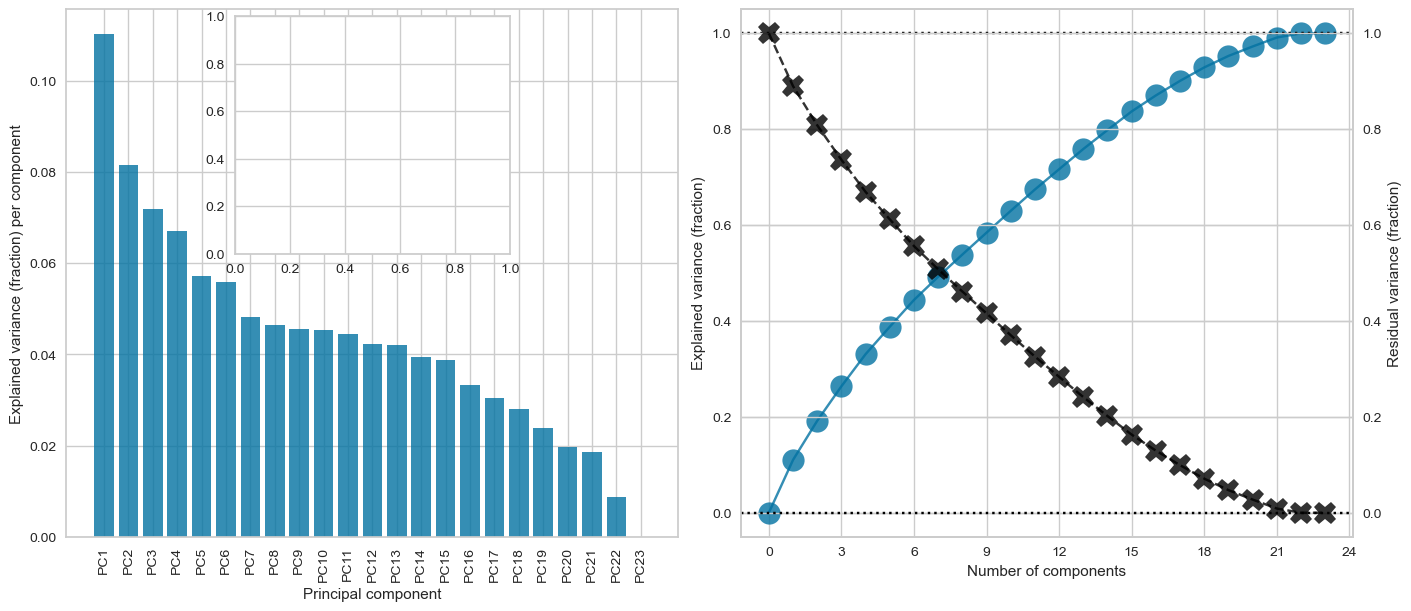

In [182]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from psynlig import (
    pca_explained_variance,
    pca_residual_variance,
    pca_explained_variance_bar,
    pca_explained_variance_pie,
    pca_1d_loadings,
    pca_2d_loadings,
    pca_2d_scores
)

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True
)
pca_explained_variance_bar(pca1, axi=ax1, alpha=0.8)
pca_explained_variance(pca1, axi=ax2, marker='o', markersize=16, alpha=0.8)

ax4 = ax2.twinx()
pca_residual_variance(
    pca1,
    ax4,
    marker='X',
    markersize=16,
    alpha=0.8,
    color='black',
    linestyle='--'
)

ax3 = inset_axes(ax1, width='45%', height='45%', loc=9)
#pca_explained_variance_pie(pca1, axi=ax3, cmap='tab20')
plt.show()

In [183]:
# Análisis de Componentes Principales (PCA)
pca = PCA(n_components=0.7) #tomamos las varibles que nos expliquen el 70% del modelo
scores = pca.fit_transform(X)
pd.DataFrame(scores)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.040794,-0.098056,-1.751529,0.776090,-0.841114,-0.559202,-0.575732,0.220101,-0.644832,1.164393,0.993311,-0.681482
1,-1.268087,0.919964,-0.047696,-1.496752,-1.106988,-0.179663,0.504968,-0.510976,1.154172,-0.771707,-1.073319,0.353841
2,-0.734644,2.503680,-0.739044,1.176977,0.599506,-0.646586,-1.006581,-0.718170,0.480406,0.365158,-1.115184,-0.607422
3,1.585881,3.361491,0.956180,3.296607,-0.961773,0.210118,-2.840216,-2.783093,-0.739446,1.120699,0.968686,0.494739
4,0.526097,-1.878609,1.541148,0.231777,-0.241981,-2.099752,2.762594,-0.606199,0.734228,-0.437012,-1.057071,-1.556573
...,...,...,...,...,...,...,...,...,...,...,...,...
59395,-2.354504,-0.911953,0.309901,-0.583822,0.665983,1.836790,0.125242,-0.570723,-0.462259,0.982498,0.239898,0.143963
59396,-1.997041,-1.194737,1.534168,0.789848,0.254282,-0.368395,-0.571559,0.539959,-0.218497,-0.595246,0.002440,0.755343
59397,3.903203,0.601502,1.616375,-0.450642,1.317560,0.551337,0.087440,0.425170,-0.514631,-0.163174,0.365284,0.567640
59398,2.112255,-1.012062,-0.263335,1.382957,-0.266334,0.303121,1.479502,0.058233,0.211680,-0.175743,-0.454836,-0.492813


In [184]:
nuevodata = pd.DataFrame(scores, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
nuevodata

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.040794,-0.098056,-1.751529,0.776090,-0.841114,-0.559202,-0.575732,0.220101,-0.644832,1.164393,0.993311,-0.681482
1,-1.268087,0.919964,-0.047696,-1.496752,-1.106988,-0.179663,0.504968,-0.510976,1.154172,-0.771707,-1.073319,0.353841
2,-0.734644,2.503680,-0.739044,1.176977,0.599506,-0.646586,-1.006581,-0.718170,0.480406,0.365158,-1.115184,-0.607422
3,1.585881,3.361491,0.956180,3.296607,-0.961773,0.210118,-2.840216,-2.783093,-0.739446,1.120699,0.968686,0.494739
4,0.526097,-1.878609,1.541148,0.231777,-0.241981,-2.099752,2.762594,-0.606199,0.734228,-0.437012,-1.057071,-1.556573
...,...,...,...,...,...,...,...,...,...,...,...,...
59395,-2.354504,-0.911953,0.309901,-0.583822,0.665983,1.836790,0.125242,-0.570723,-0.462259,0.982498,0.239898,0.143963
59396,-1.997041,-1.194737,1.534168,0.789848,0.254282,-0.368395,-0.571559,0.539959,-0.218497,-0.595246,0.002440,0.755343
59397,3.903203,0.601502,1.616375,-0.450642,1.317560,0.551337,0.087440,0.425170,-0.514631,-0.163174,0.365284,0.567640
59398,2.112255,-1.012062,-0.263335,1.382957,-0.266334,0.303121,1.479502,0.058233,0.211680,-0.175743,-0.454836,-0.492813


(<Figure size 1040x715 with 1 Axes>,
 <AxesSubplot:xlabel='Principal component', ylabel='Eigenvalue'>)

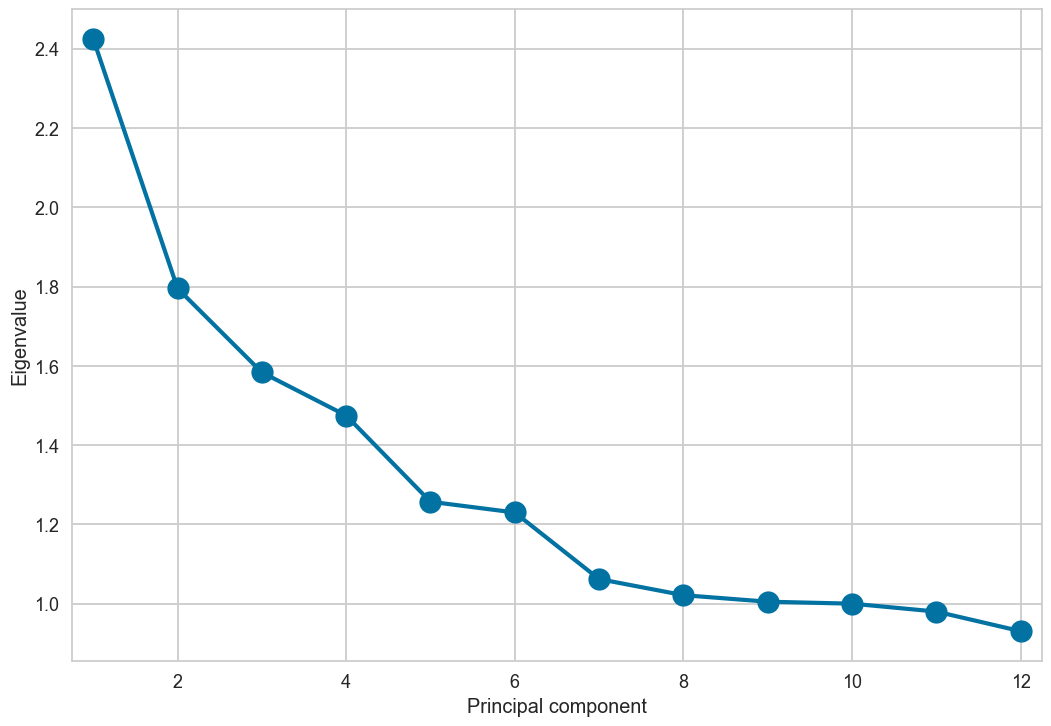

In [185]:
from psynlig import pca_scree
plt.style.use('seaborn-talk')

pca_scree(pca, marker='o', markersize=16, lw=3)

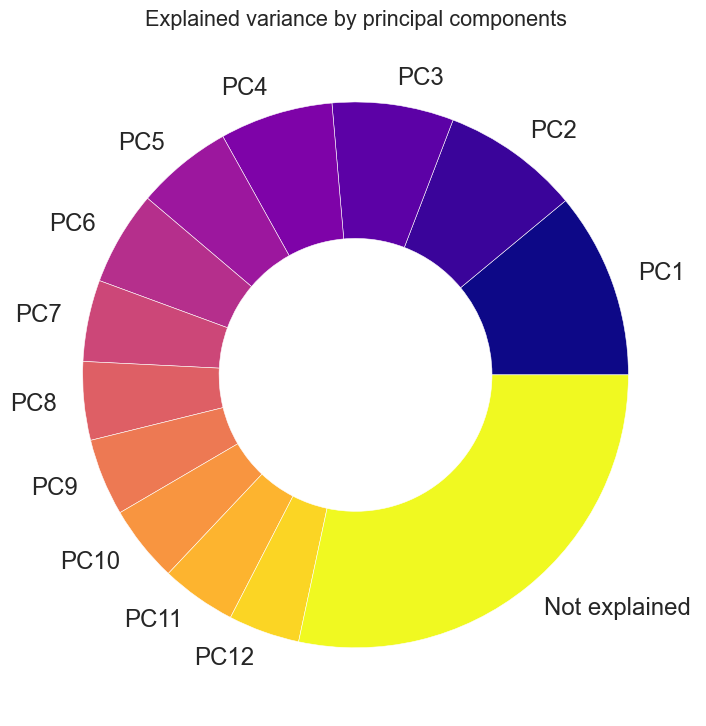

'Como estamos cogiendo 13 variables que nos explican más del 70% de ahí que tengamos una parte no explicada que es donde se encuentran los otros 28 variables que faltan. También podemos ver cómo la primera variable es la que más explica.'

In [186]:
from psynlig import pca_explained_variance_pie
plt.style.use('seaborn-talk')

fig, axi = pca_explained_variance_pie(pca, cmap='plasma')
axi.set_title('Explained variance by principal components')

plt.show()

'''Como estamos cogiendo 13 variables que nos explican más del 70% de ahí que tengamos una parte no explicada que es donde se encuentran los otros 28 variables que faltan. También podemos ver cómo la primera variable es la que más explica.'''

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [23] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [19] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [23] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[19]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 19 Principal Components explain [97.25%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

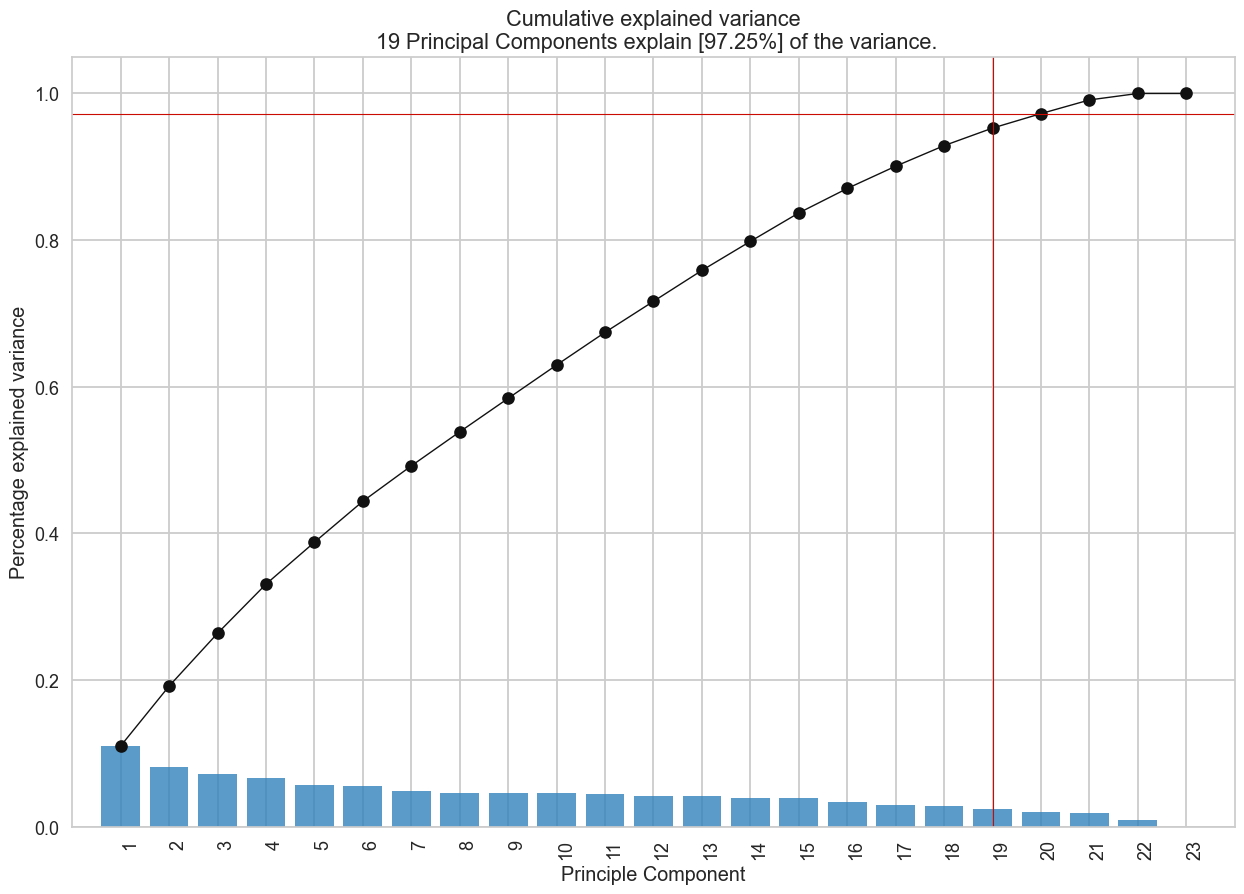

In [187]:
#PCA con el paquete pca
# Load library
from pca import pca

# Initialize pca with default parameters
model = pca(normalize=True)

# Fit transform
results = model.fit_transform(df_train_1)

# Plot the explained variance

model.plot()

In [188]:
results

{'loadings':             id  date_recorded    funder  gps_height  installer  num_private  \
 PC1   0.000819      -0.223058  0.086161   -0.492645   0.050977    -0.011764   
 PC2  -0.005390       0.267279  0.250167    0.206104   0.304260     0.023163   
 PC3   0.004729      -0.168431 -0.530896   -0.097034  -0.457301     0.016499   
 PC4  -0.005660      -0.380375  0.338348   -0.090791   0.395233     0.087543   
 PC5   0.006945      -0.001312  0.071879   -0.161325   0.032457     0.050930   
 PC6  -0.014478       0.127429 -0.023572    0.056755  -0.123492    -0.010780   
 PC7   0.009796       0.017734  0.022084   -0.011196  -0.010569     0.093818   
 PC8  -0.018363      -0.191303 -0.056056    0.229038  -0.040607     0.215602   
 PC9  -0.422931       0.027992 -0.040680   -0.013256  -0.055683     0.769854   
 PC10  0.887927       0.057848 -0.039212    0.007202  -0.028909     0.290756   
 PC11  0.172479      -0.118181  0.075802   -0.055195   0.042534     0.448630   
 PC12 -0.012635       0.0993

In [189]:
model.results['loadings']

,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff
PC1,0.000819,-0.223058,0.086161,-0.492645,0.050977,-0.011764,0.066084,0.110475,-0.056330,-0.033683,...,-0.126511,-0.421746,0.328594,0.087272,-0.123984,-0.187594,0.027319,-0.153077,0.391301,0.0
PC2,-0.005390,0.267279,0.250167,0.206104,0.304260,0.023163,0.158090,0.153170,0.203796,0.145103,...,-0.072287,0.385139,0.287543,-0.081582,0.168543,-0.127107,0.063706,-0.338558,0.199701,-0.0
PC3,0.004729,-0.168431,-0.530896,-0.097034,-0.457301,0.016499,0.471214,0.249123,0.056011,0.030889,...,0.017601,0.213692,0.192354,-0.225461,-0.079389,-0.060640,-0.031977,-0.103920,-0.066509,-0.0
PC4,-0.005660,-0.380375,0.338348,-0.090791,0.395233,0.087543,0.354698,0.156731,0.024478,0.041704,...,0.354744,0.059316,-0.046861,-0.144095,-0.239727,-0.012267,-0.128460,-0.021982,-0.191929,-0.0
PC5,0.006945,-0.001312,0.071879,-0.161325,0.032457,0.050930,0.076397,-0.215532,-0.444468,-0.232013,...,0.066521,-0.072329,0.267527,-0.004003,0.448040,-0.014033,-0.073874,-0.399137,-0.279229,0.0
PC6,-0.014478,0.127429,-0.023572,0.056755,-0.123492,-0.010780,0.194841,0.046544,-0.351242,0.118218,...,0.283620,0.122295,0.000870,0.540264,0.245816,-0.211752,-0.253866,0.249727,0.201915,-0.0
PC7,0.009796,0.017734,0.022084,-0.011196,-0.010569,0.093818,0.090144,-0.256133,-0.330894,0.022294,...,0.341012,0.030089,-0.098989,-0.267744,-0.091483,-0.250406,0.656111,0.197464,0.061567,0.0
PC8,-0.018363,-0.191303,-0.056056,0.229038,-0.040607,0.215602,-0.072146,-0.516325,-0.040188,-0.394233,...,-0.078594,0.124270,0.262446,0.030318,-0.328752,0.142033,-0.153606,-0.061686,0.153195,-0.0
PC9,-0.422931,0.027992,-0.040680,-0.013256,-0.055683,0.769854,-0.039334,-0.086099,0.066491,0.400124,...,0.009462,-0.042901,0.057652,0.055753,0.028864,0.033310,-0.017380,-0.052834,-0.034700,0.0
PC10,0.887927,0.057848,-0.039212,0.007202,-0.028909,0.290756,-0.032090,-0.122995,0.059307,0.243260,...,0.091005,-0.020247,0.066261,0.001349,-0.028687,-0.010005,-0.074954,-0.065267,0.006707,0.0


In [190]:
model1 = pca(normalize=True,n_components=0.7)
results1 = model1.fit_transform(df_train_1)
model1.results['loadings']

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [70.0%] explained variance using the [23] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [70.00%] explained variance.
[pca] >The PCA reduction is performed on the [23] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff
PC1,0.000819,-0.223058,0.086161,-0.492645,0.050977,-0.011764,0.066084,0.110475,-0.056330,-0.033683,...,-0.126511,-0.421746,0.328594,0.087272,-0.123984,-0.187594,0.027319,-0.153077,0.391301,0.0
PC2,-0.005390,0.267279,0.250167,0.206104,0.304260,0.023163,0.158090,0.153170,0.203796,0.145103,...,-0.072287,0.385139,0.287543,-0.081582,0.168543,-0.127107,0.063706,-0.338558,0.199701,-0.0
PC3,0.004729,-0.168431,-0.530896,-0.097034,-0.457301,0.016499,0.471214,0.249123,0.056011,0.030889,...,0.017601,0.213692,0.192354,-0.225461,-0.079389,-0.060640,-0.031977,-0.103920,-0.066509,0.0
PC4,-0.005660,-0.380375,0.338348,-0.090791,0.395233,0.087543,0.354698,0.156731,0.024478,0.041704,...,0.354744,0.059316,-0.046861,-0.144095,-0.239727,-0.012267,-0.128460,-0.021982,-0.191929,-0.0
PC5,0.006945,-0.001312,0.071879,-0.161325,0.032457,0.050930,0.076397,-0.215532,-0.444468,-0.232013,...,0.066521,-0.072329,0.267527,-0.004003,0.448040,-0.014033,-0.073874,-0.399137,-0.279229,-0.0
PC6,-0.014478,0.127429,-0.023572,0.056755,-0.123492,-0.010780,0.194841,0.046544,-0.351242,0.118218,...,0.283620,0.122295,0.000870,0.540264,0.245816,-0.211752,-0.253866,0.249727,0.201915,-0.0
PC7,0.009796,0.017734,0.022084,-0.011196,-0.010569,0.093818,0.090144,-0.256133,-0.330894,0.022294,...,0.341012,0.030089,-0.098989,-0.267744,-0.091483,-0.250406,0.656111,0.197464,0.061567,0.0
PC8,-0.018363,-0.191303,-0.056056,0.229038,-0.040607,0.215602,-0.072146,-0.516325,-0.040188,-0.394233,...,-0.078594,0.124270,0.262446,0.030318,-0.328752,0.142033,-0.153606,-0.061686,0.153195,-0.0
PC9,-0.422931,0.027992,-0.040680,-0.013256,-0.055683,0.769854,-0.039334,-0.086099,0.066491,0.400124,...,0.009462,-0.042901,0.057652,0.055753,0.028864,0.033310,-0.017380,-0.052834,-0.034700,0.0
PC10,0.887927,0.057848,-0.039212,0.007202,-0.028909,0.290756,-0.032090,-0.122995,0.059307,0.243260,...,0.091005,-0.020247,0.066261,0.001349,-0.028687,-0.010005,-0.074954,-0.065267,0.006707,-0.0


In [191]:
# Matriz de predictores
X = df_train_1.drop(["diff"], axis=1)

# Variable objetivo para la regresión logística
y = df_labels['status_group']

# Partición training-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [192]:
print(X.shape)
print(y.shape)

(59400, 22)
(59400,)


In [193]:
# Definimos los pasos del pipeline
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=0.7)),
         ('clf', Perceptron())]  #'clf', RidgeClassifier()//'clf', SGDClassifier())//Perceptron())
# Construimos el pipeline
pipe_lr = Pipeline(steps)

# Ajustamos el proceso del pipe en training
pipe_lr.fit(X_train, y_train)
# Predicciones en training
train_predictions = pipe_lr.predict(X_train)
# Predicciones en test
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
                         precision    recall  f1-score   support

             functional       0.55      0.81      0.65     25818
functional needs repair       0.08      0.01      0.02      3454
         non functional       0.41      0.19      0.26     18248

               accuracy                           0.52     47520
              macro avg       0.35      0.34      0.31     47520
           weighted avg       0.46      0.52      0.46     47520

TEST:
                         precision    recall  f1-score   support

             functional       0.55      0.81      0.65      6441
functional needs repair       0.10      0.01      0.01       863
         non functional       0.41      0.20      0.27      4576

               accuracy                           0.52     11880
              macro avg       0.35      0.34      0.31     11880
           weighted avg       0.46      0.52      0.46     11880



In [194]:
# Score final (accuracy)
pipe_lr.score(X_test,y_test)

0.5186868686868686

" 0.5918350168350168 "Modelo bastante malo, donde no llega ni al 60%, era de esperarse utilizando el modelo 'clf', LogisticRegression()) que es para binarias

"0.5913299663299664 "Modelo bastante malo, donde no llega ni al 60%, era de esperarse utilizando el modelo 'clf', RidgeClassifier() que es para binarias


"0.5910774410774411" Modelo bastante malo, donde no llega ni al 60%, era de esperarse utilizando el modelo 'clf', SGDClassifier() que es para binarias

"0.5334175084175085" Modelo bastante malo, donde no llega ni al 60%, era de esperarse utilizando el modelo 'clf', Perceptron() que es para binarias

In [195]:
df_test = df_test.drop(columns = ['id']).values

In [196]:
pipe_lr.predict(X_test)

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype='<U23')

In [197]:
Perceptron = pipe_lr.predict(df_test)

In [198]:
preds_perceptron = pd.DataFrame(Perceptron)
preds_perceptron = preds_perceptron.rename(columns={0: 'status_group'})
preds_perceptron.head()

,status_group
0,functional needs repair
1,functional needs repair
2,functional needs repair
3,functional needs repair
4,functional needs repair


In [199]:
predict = pd.concat([id, preds_perceptron], axis=1)
predict.head()

,id,status_group
0,50785,functional needs repair
1,51630,functional needs repair
2,17168,functional needs repair
3,45559,functional needs repair
4,49871,functional needs repair


In [200]:
predict.to_csv('pump_test_for_perceptron.csv', index=False)

##### Han salido bastante malos los modelos anteriores (0,0724), por lo que vamos a descartarlos y vamos a seguir buscando modelos

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
df_train.shape

(59400, 24)

In [203]:
df_train.head()

,id,date_recorded,funder,gps_height,installer,num_private,basin,district_code,lga,ward,...,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,diff,status_group
0,69572,54,1548,1390,1706,0,1,5,51,1429,...,1999,1,7,2,6,1,8,1,1,functional
1,8776,322,522,1399,610,0,4,2,103,1581,...,2010,1,11,0,6,2,5,1,1,functional
2,34310,313,924,686,2296,0,5,4,108,1629,...,2009,1,7,4,6,1,0,2,1,functional
3,67743,285,1961,263,2078,0,7,63,87,1576,...,1986,10,7,0,6,0,3,2,1,non functional
4,19728,111,20,0,133,0,4,1,26,1692,...,0,1,1,0,6,3,5,1,1,functional


In [204]:
X = df_train.drop(columns = ['id', 'status_group']).values
y = df_train['status_group'].values

In [205]:
print(X.shape)
print(y.shape)

(59400, 22)
(59400,)


In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
print('Training set: ',X_train.shape,y_train.shape)
print('Testing set: ',X_test.shape,y_test.shape)

Training set:  (47520, 22) (47520,)
Testing set:  (11880, 22) (11880,)


### 8.3. Red neuronal

In [208]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

from sklearn.neural_network import MLPClassifier

In [209]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [210]:
MPL1 = clf.predict(X_test)
MPL1.shape

(11880,)

In [211]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, MPL1))

Train set Accuracy:  0.5427609427609428
Test set Accuracy:  0.5433501683501684


In [212]:
MPL1 = clf.predict(df_test)

In [213]:
preds_mpl = pd.DataFrame(MPL1)
preds_mpl = preds_mpl.rename(columns={0: 'status_group'})
preds_mpl.head()

,status_group
0,functional
1,functional
2,functional
3,functional
4,functional


In [214]:
predict = pd.concat([id, preds_mpl], axis=1)
predict.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


In [215]:
predict.to_csv('pump_test_for_mpl.csv', index=False)

Public score: 0.5461

### 8.5. Extra tree clasifier

In [216]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, random_state=1234)
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train, y_train)
cls.score(X_test, y_test)

0.7881481481481482

In [217]:
ETC1 = cls.predict(X_test)
ETC1

array(['functional', 'functional', 'functional', ..., 'non functional',
       'functional', 'functional needs repair'], dtype=object)

In [218]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, cls.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, ETC1))

Train set Accuracy:  0.9587654320987654
Test set Accuracy:  0.7881481481481482


In [219]:
ETC1 = cls.predict(df_test)
ETC1

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [220]:
preds = pd.DataFrame(ETC1)
preds = preds.rename(columns={0: 'status_group'})
preds.head()

,status_group
0,non functional
1,functional
2,functional
3,non functional
4,functional


In [221]:
df_test.shape, preds.shape

((14850, 22), (14850, 1))

In [222]:
predict = pd.concat([id, preds], axis=1)
predict.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [223]:
predict.to_csv('pump_test_for_ETC.csv', index=False)

#### Boosting

In [224]:
boosting_cls = AdaBoostClassifier(extra_tree, n_estimators=50, learning_rate=1.0, random_state=1234).fit(
    X_train, y_train)
boosting_cls.score(X_test, y_test)

0.774006734006734

In [225]:
ETC1_boost = boosting_cls.predict(df_test)
ETC1_boost

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [226]:
preds = pd.DataFrame(ETC1_boost)
preds = preds.rename(columns={0: 'status_group'})
preds.head()

,status_group
0,non functional
1,functional
2,functional
3,non functional
4,functional


In [227]:
predict = pd.concat([id, preds], axis=1)
predict.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [228]:
predict.to_csv('pump_test_for_ETC1_boost.csv', index=False)

Public score: 0,7805

### 8.6. Random Forest Classifier

In [229]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=None).fit(X_train, y_train)

In [230]:
RFC = rfc.predict(X_test)
RFC

array(['functional', 'functional', 'functional', ..., 'non functional',
       'functional', 'functional needs repair'], dtype=object)

In [231]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [232]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, RFC))

Train set Accuracy:  0.9725925925925926
Test set Accuracy:  0.7975084175084175


In [233]:
RFC = rfc.predict(df_test)
RFC

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [234]:
preds = pd.DataFrame(RFC)

In [235]:
preds = preds.rename(columns={0: 'status_group'})
preds.head()

,status_group
0,non functional
1,functional
2,functional
3,non functional
4,functional


In [236]:
df_test = pd.DataFrame(df_test)

In [237]:
predict = pd.concat([id, preds], axis=1)

In [238]:
predict.to_csv('pump_test_for_models3.csv', index=False)

Public score: 0,8013

#### Baggin

In [239]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=None).fit(X_train, y_train)
rfc_baggin = BaggingClassifier(rfc, n_estimators=10, random_state=1234).fit(
    X_train, y_train)
rfc_baggin.score(X_test, y_test)

0.8051178451178451

In [240]:
RFC_baggin = rfc_baggin.predict(df_test)
RFC_baggin

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [241]:
preds = pd.DataFrame(RFC_baggin)

In [242]:
preds = preds.rename(columns={0: 'status_group'})
preds.head()

,status_group
0,non functional
1,functional
2,functional
3,non functional
4,functional


In [243]:
predict = pd.concat([id, preds], axis=1)

In [244]:
predict.to_csv('pump_test_for_RFC_baggin.csv', index=False)

Public score: 0.8072

### 8.7. Gradient Boosting Classifier

In [245]:
X = df_train.drop(columns = ['id', 'status_group']).values
y = df_train['status_group'].values

In [246]:
print(X.shape)
print(y.shape)

(59400, 22)
(59400,)


In [247]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, random_state=1234)

In [248]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)

In [249]:
clf.score(X_test, y_test)

0.7397979797979798

In [250]:
X_test.shape

(14850, 22)

In [251]:
y_test.shape

(14850,)

In [252]:
GBC1 = clf.predict(df_test)
GBC1

array(['functional', 'functional', 'non functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [253]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, GBC1))

Train set Accuracy:  0.9726374859708193
Test set Accuracy:  0.49144781144781147


In [254]:
GBC1 = clf.predict(df_test)
GBC1

array(['functional', 'functional', 'non functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [255]:
preds_gbc = pd.DataFrame(GBC1)
preds_gbc = preds.rename(columns={0: 'status_group'})
preds.head()

,status_group
0,non functional
1,functional
2,functional
3,non functional
4,functional


In [256]:
predict_gbc = pd.concat([id, preds_gbc], axis=1)
predict_gbc.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [257]:
predict.to_csv('pump_test_for_gbc.csv', index=False)

Public score: 0.8072

### 8.8. Pycaret

Con esto compara con los modelos que tiene, de ahí que hayamos probado con distintos modelos para ver si funciona, el mejor es el Random Forest y que hemos trabajado anteriormente con él

In [258]:
import pycaret
from pycaret.classification import *

In [259]:
model_setup = setup(data=df_train, target='status_group', session_id=1)

,Description,Value
0,Session id,1
1,Target,status_group
2,Target type,Multiclass
3,Target mapping,"functional: 0, functional needs repair: 1, non functional: 2"
4,Original data shape,"(59400, 24)"
5,Transformed data shape,"(59400, 24)"
6,Transformed train set shape,"(41580, 24)"
7,Transformed test set shape,"(17820, 24)"
8,Numeric features,21
9,Preprocess,True


In [260]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [261]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7973,0.8976,0.7973,0.7907,0.7905,0.6207,0.6240,4.3450
xgboost,Extreme Gradient Boosting,0.7946,0.8961,0.7946,0.7917,0.7826,0.6077,0.6167,10.3940
lightgbm,Light Gradient Boosting Machine,0.7880,0.8918,0.7880,0.7884,0.7740,0.5922,0.6046,2.0010
et,Extra Trees Classifier,0.7870,0.8828,0.7870,0.7808,0.7825,0.6060,0.6073,4.8270
gbc,Gradient Boosting Classifier,0.7499,0.8538,0.7499,0.7593,0.7269,0.5083,0.5317,16.4160
dt,Decision Tree Classifier,0.7295,0.7616,0.7295,0.7317,0.7305,0.5124,0.5125,0.6430
ada,Ada Boost Classifier,0.7245,0.8092,0.7245,0.7167,0.6936,0.4548,0.4768,3.6970
lda,Linear Discriminant Analysis,0.6112,0.6733,0.6112,0.5648,0.5763,0.2257,0.2390,0.4240
nb,Naive Bayes,0.5945,0.6692,0.5945,0.5874,0.5740,0.2228,0.2341,0.3910
lr,Logistic Regression,0.5492,0.5857,0.5492,0.4929,0.4884,0.0728,0.0869,1.6690


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [262]:
model_xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8054,0.9029,0.8054,0.8030,0.7930,0.6282,0.6369
1,0.7886,0.8939,0.7886,0.7869,0.7789,0.5979,0.6070
2,0.7869,0.8868,0.7869,0.7858,0.7743,0.5914,0.6024
3,0.7944,0.8954,0.7944,0.7922,0.7801,0.6049,0.6163
4,0.7876,0.8933,0.7876,0.7841,0.7767,0.5954,0.6040
5,0.8016,0.9017,0.8016,0.7971,0.7899,0.6219,0.6298
6,0.7910,0.8920,0.7910,0.7868,0.7799,0.6023,0.6096
7,0.7941,0.9004,0.7941,0.7929,0.7820,0.6061,0.6157
8,0.7977,0.8999,0.7977,0.7918,0.7845,0.6142,0.6215


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [264]:
tune_model_xgboost = tune_model(model_xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7896,0.8923,0.7896,0.7858,0.7746,0.5956,0.6062
1,0.7727,0.8794,0.7727,0.7719,0.7586,0.5624,0.5751
2,0.7710,0.8716,0.7710,0.7709,0.7548,0.5571,0.5713
3,0.7780,0.8827,0.7780,0.7801,0.7617,0.5704,0.5848
4,0.7696,0.8804,0.7696,0.7662,0.7551,0.5567,0.5691
5,0.7835,0.8895,0.7835,0.7796,0.7690,0.5844,0.5947
6,0.7722,0.8765,0.7722,0.7700,0.7571,0.5614,0.5733
7,0.7797,0.8860,0.7797,0.7823,0.7652,0.5757,0.5871
8,0.7811,0.8869,0.7811,0.7777,0.7654,0.5796,0.5890


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [265]:
print(tune_model_xgboost)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


Intentando afinar los modelos que me aparecen en el pycaret, todos salen peores que los originales por lo que los he descartado

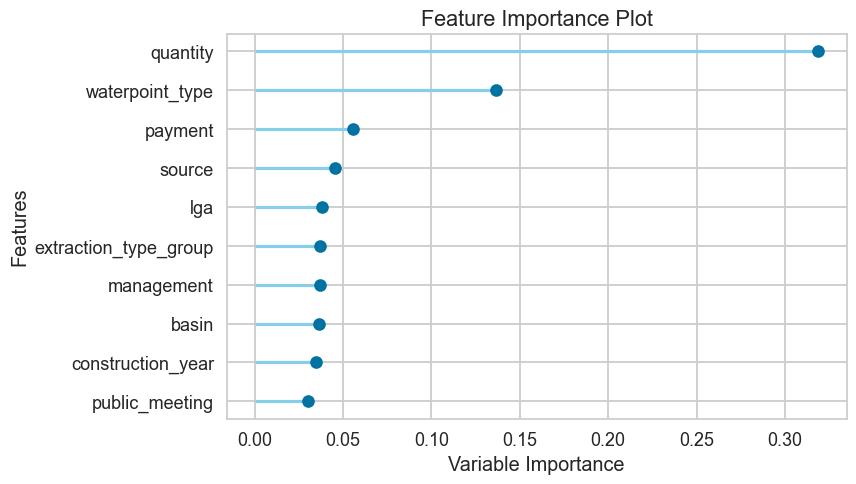

In [266]:
plot_model(tune_model_xgboost, plot='feature')

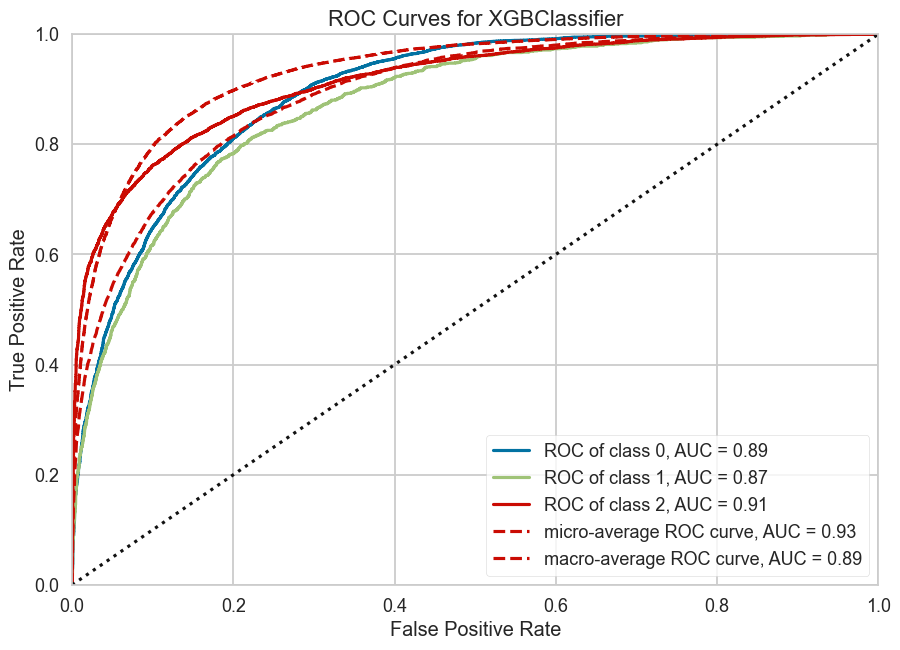

In [267]:
plot_model(tune_model_xgboost, plot='auc')

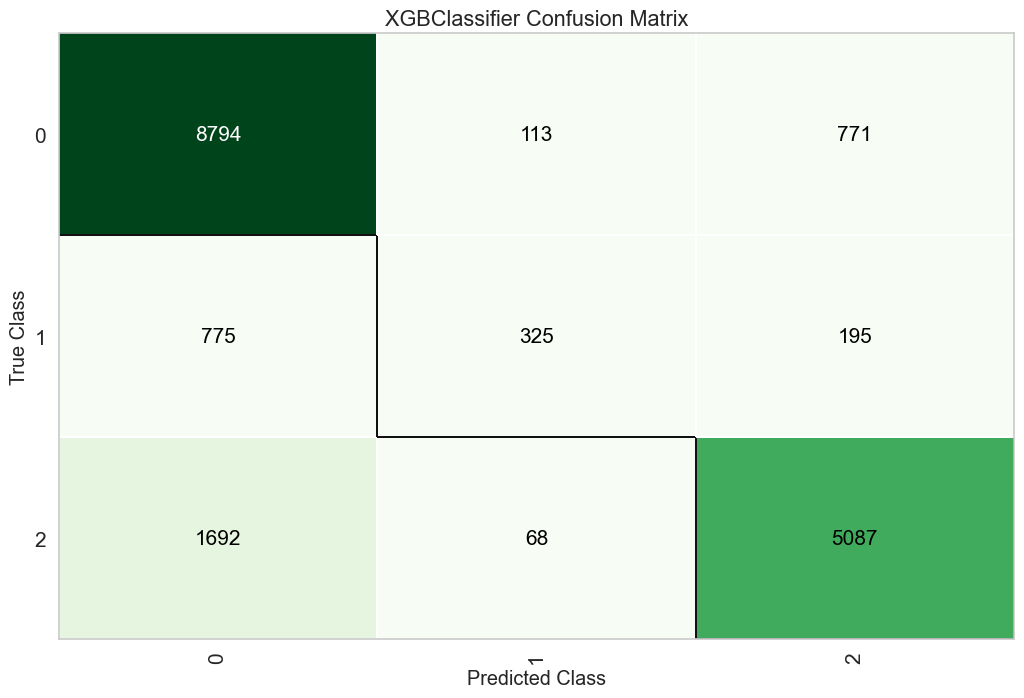

In [268]:
plot_model(tune_model_xgboost, plot='confusion_matrix')